In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from scipy.cluster.hierarchy import cophenet
import scipy.io
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import fcluster
from numpy import genfromtxt
import pandas as pd
import csv

In [2]:
data = scipy.io.loadmat('word_vec.mat')
hashtag_data = scipy.io.loadmat('hashtag_vec.mat')
div_hashtag_data = scipy.io.loadmat('indiv_hashtag_vec_ls_5.mat')
div_org_hashtag_data = scipy.io.loadmat('org_hashtag_vec_ls_5.mat')
div_word_data = scipy.io.loadmat('indiv_word_vec_ls_5.mat')
div_org_word_data = scipy.io.loadmat('org_word_vec_ls_5.mat')

indiv_data = data['individual_data']
hashtag_indiv_data = hashtag_data['individual_data']

div_hashtag_data = div_hashtag_data['data']
div_org_hashtag_data = div_org_hashtag_data['data']
div_hashtag_data = np.concatenate((div_org_hashtag_data, div_hashtag_data))

div_word_data = div_word_data['data']
div_org_word_data = div_org_word_data['data']
div_word_data = np.concatenate((div_org_word_data,div_word_data))


indiv_data_normalized = np.dot(np.diag(1.0 / np.linalg.norm(indiv_data, axis=1)), indiv_data)
hashtag_normalized = np.dot(np.diag(1.0 / (0.0000001 + np.linalg.norm(hashtag_indiv_data, axis=1))), hashtag_indiv_data)
div_hashtag_normalized = np.dot(np.diag(1.0 / (0.0000001 + np.linalg.norm(div_hashtag_data, axis=1))), div_hashtag_data)
div_word_normalized = np.dot(np.diag(1.0 / (0.0000001 + np.linalg.norm(div_word_data, axis=1))), div_word_data)

condensed_dist_vector = pdist(indiv_data_normalized, 'euclidean')

In [3]:
Z = linkage(indiv_data_normalized, 'ward')
hZ= linkage(hashtag_normalized, 'ward')
divZ = linkage(div_word_normalized, 'ward')
divhZ = linkage(div_hashtag_normalized, 'ward')

In [4]:
# How well does the clustering preserve the original distance
c, coph_dists = cophenet(Z, condensed_dist_vector)
c # Closer to 1 means better preservation

0.76440577848700375

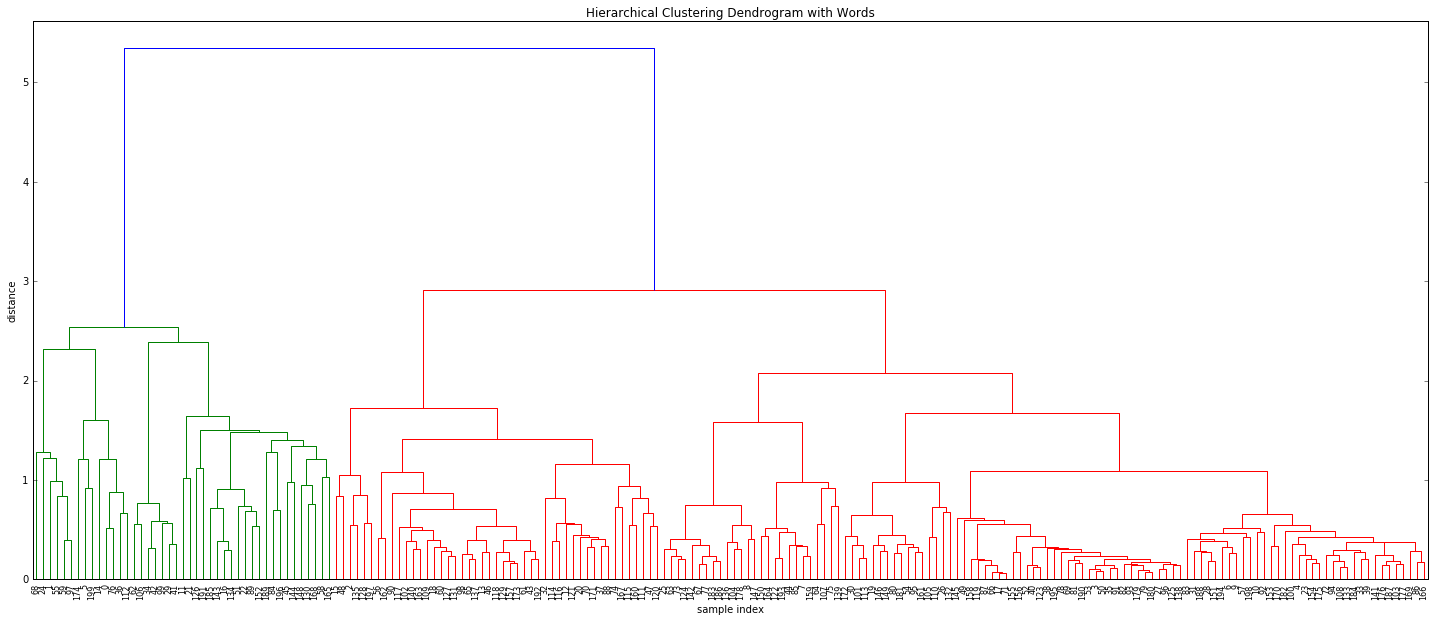

In [5]:
# Basic dendrogram
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram with Words')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8  # font size for the x axis labels
)
plt.show()

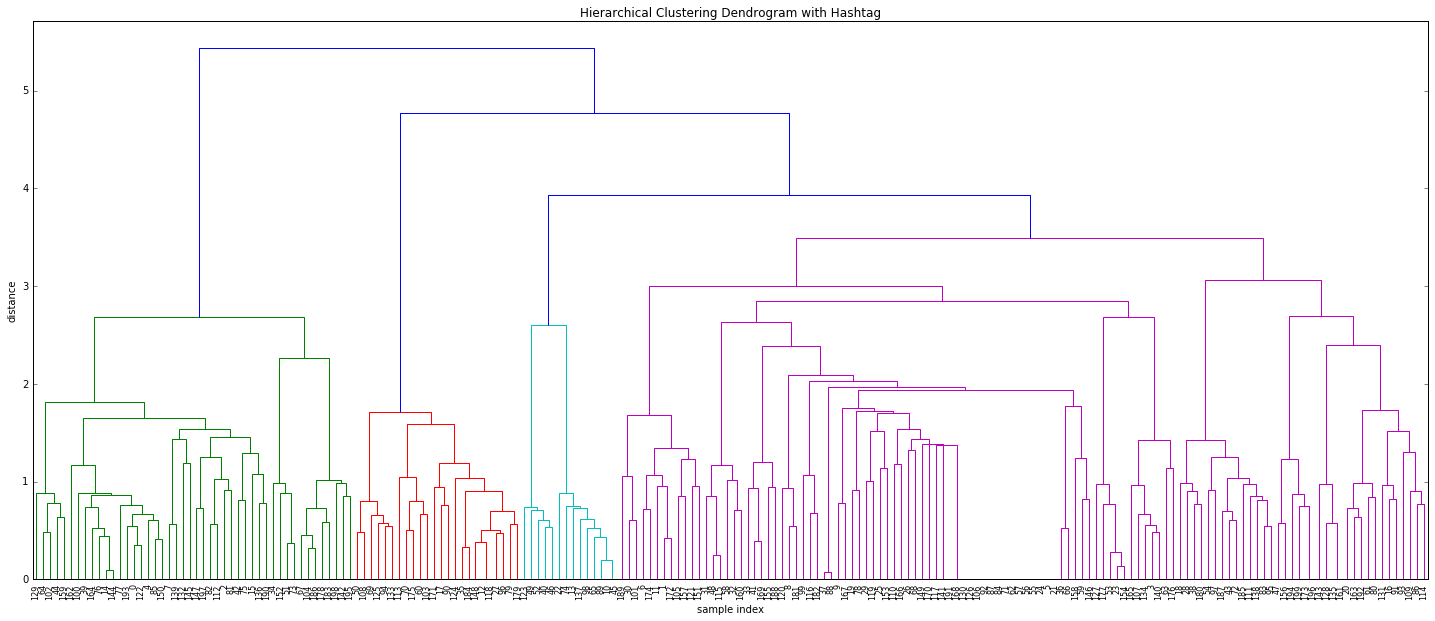

In [6]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram with Hashtag')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    hZ,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8  # font size for the x axis labels
)
plt.show()

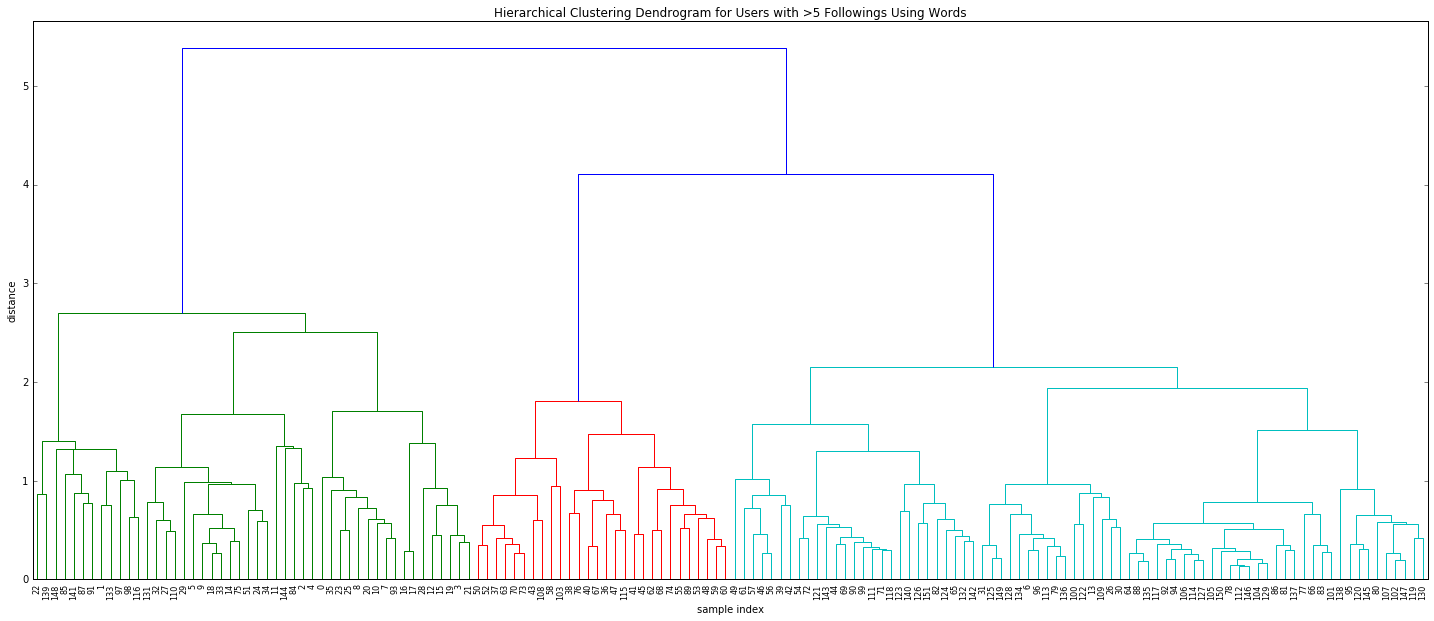

In [7]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram for Users with >5 Followings Using Words')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    divZ,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8  # font size for the x axis labels
)
plt.show()

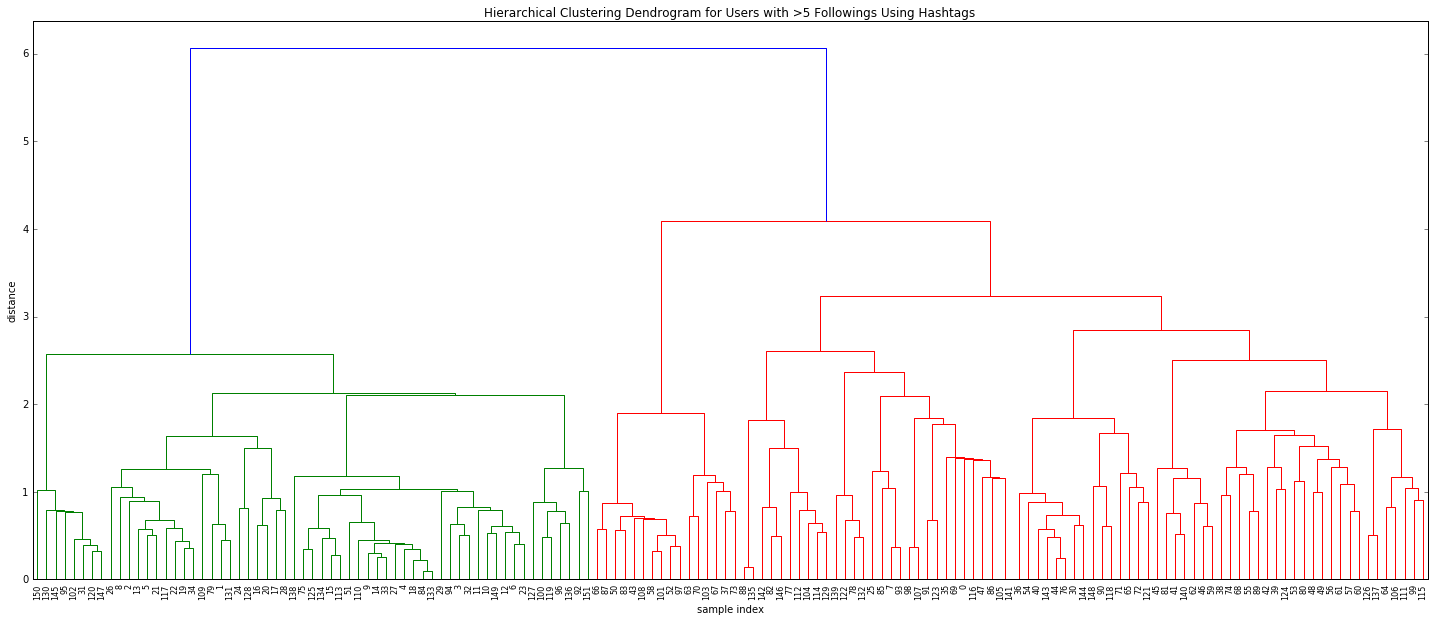

In [8]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram for Users with >5 Followings Using Hashtags')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    divhZ,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8  # font size for the x axis labels
)
plt.show()

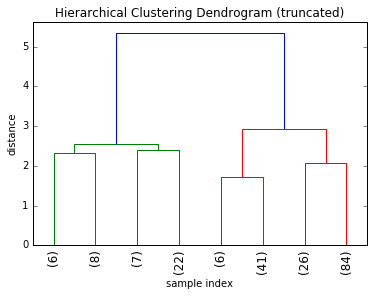

In [9]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=8,  # show only the last p merged clusters
    leaf_rotation=90,
    leaf_font_size=12  # to get a distribution impression in truncated branches
)
plt.show()

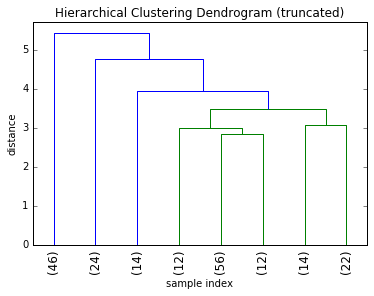

In [10]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    hZ,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=8,  # show only the last p merged clusters
    leaf_rotation=90,
    leaf_font_size=12  # to get a distribution impression in truncated branches
)
plt.show()

In [11]:
k=8
cluster = fcluster(Z, k, criterion='maxclust')
hcluster = fcluster(hZ, k, criterion='maxclust')
div_cluster = fcluster(divZ, k, criterion='maxclust')
divh_cluster = fcluster(divhZ, k, criterion='maxclust')

In [12]:
#Read in stance
stance = pd.read_csv('indiv_final_stance_word.csv').values
stance = stance[:,1]

hstance = pd.read_csv('indiv_final_stance_hashtag.csv').values
hstance = hstance[:,1]

div_stance = pd.read_csv('org_final_stance_word_ls_5.csv').values
div_stance = div_stance[:,1]
div_indiv_stance = pd.read_csv('indiv_final_stance_word_ls_5.csv').values
div_indiv_stance = div_indiv_stance[:,1]
div_stance = np.concatenate((div_stance, div_indiv_stance))

divh_stance = pd.read_csv('org_final_stance_hashtag_ls_5.csv').values
divh_stance = divh_stance[:,1]
divh_indiv_stance = pd.read_csv('indiv_final_stance_hashtag_ls_5.csv').values
divh_indiv_stance = divh_indiv_stance[:,1]
divh_stance = np.concatenate((divh_stance, divh_indiv_stance))

In [13]:
#People list
people = pd.read_csv('proportion.csv')
people = people['User'].values

div_people = pd.read_csv('org_proportion_ls_5.csv')
div_people = div_people['account name'].values
div_indiv_people = pd.read_csv('indiv_proportion_ls_5.csv')
div_indiv_people = div_indiv_people['account name'].values
div_people = np.concatenate((div_people, div_indiv_people))

#Diversity
diversity = genfromtxt('proportion.csv', delimiter=',',usecols=2, skip_header=1)
diversity = (diversity - 0.5)*2

div_diversity = genfromtxt('org_proportion_ls_5.csv', delimiter=',',usecols=2, skip_header=1)
div_diversity = (div_diversity - 0.5)*2
div_indiv_diversity = genfromtxt('indiv_proportion_ls_5.csv', delimiter=',',usecols=2, skip_header=1)
div_indiv_diversity = (div_indiv_diversity - 0.5)*2
div_diversity = np.concatenate((div_diversity, div_indiv_diversity))

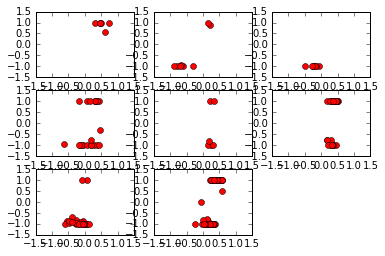

In [14]:
# Plot for each cluster the relationship between diversity and stance
cluster_dict = {}
plt.figure(1)
for i in range(len(np.unique(cluster))):
    index = np.where(cluster==(i+1))[0]
    cluster_dict['cluster' + str(i)] = people[index]
    x = stance[index]
    y = diversity[index]
    plot_num = 331+i
    plt.subplot(plot_num)
    plt.plot(x,y,'ro')
    plt.axis([-1.5,1.5,-1.5,1.5])
plt.show()

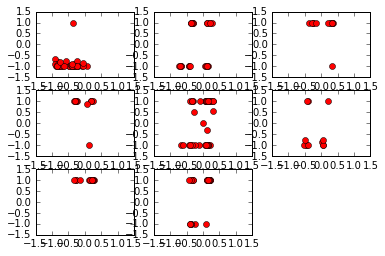

In [15]:
h_cluster_dict = {}
plt.figure(1)
for i in range(len(np.unique(hcluster))):
    index = np.where(hcluster==(i+1))[0]
    h_cluster_dict['cluster' + str(i)] = people[index]
    x = hstance[index]
    y = diversity[index]
    plot_num = 331+i
    plt.subplot(plot_num)
    plt.plot(x,y,'ro')
    plt.axis([-1.5,1.5,-1.5,1.5])
plt.show()

In [16]:
%matplotlib
div_cluster_dict = {}
plt.figure(1)
for i in range(len(np.unique(div_cluster))):
    index = np.where(div_cluster==(i+1))[0]
    div_cluster_dict['cluster' + str(i)] = div_people[index]
    x = div_stance[index]
    y = div_diversity[index]
    plot_num = 331+i
    plt.subplot(plot_num)
    plt.plot(x,y,'ro')
    plt.ylabel('Diversity')
    plt.xlabel('Stance')
    plt.axis([-1.5,1.5,-1.5,1.5])

plt.suptitle('Clusters of Users with >5 Followings using Tweet Words')
plt.show()

Using matplotlib backend: Qt4Agg


In [17]:
#Usernames of each cluster
div_cluster_dict

{'cluster0': array(['AbolitionAHA', 'prolifealliance', 'bakerbarb54130',
        'braincavanagh', 'ch7pg3', 'defenderofthe8', 'Disciple4Lif',
        'justinbook18', 'Prolifefriend', 'scarr6612', 'shaunkenyon1967',
        'trianglescheme'], dtype=object),
 'cluster1': array(['AbortionGroup', 'AntiAbrtionGang', 'AUL', 'FightAbortion',
        'HumanCoalition', 'LGBTQProLife', 'nrlc', 'prolifecampaign',
        'ProLifePolitics', 'ProLifeYouth', 'SanDiegoProLife', 'SBAList',
        'spucprolife', 'Feminists4Life', 'ABabysRights', 'AustCBR',
        'Hweininger', 'OnlyGirlOfTen', 'soihadanabort'], dtype=object),
 'cluster2': array(['40daysforlife', 'AmerLifeLeague', 'CA_ProLife', 'ExposeAbortion',
        'frfrankpavone', 'KeepLifeLegal', 'LifeNewsHQ', 'LilaGraceRose',
        'LiveAction', 'operationrescue', 'PLAM_org', 'ProLifeAction',
        'ProLifeBlogs', 'ProLifeDem', 'prolifepoppop', 'usccbprolife',
        'ClevelandRTL'], dtype=object),
 'cluster3': array(['Abortion_Rights', '

In [23]:
#Look at the cluster5's unusual people
index = np.where(div_cluster==(6))[0]
cluster5 = div_people[index]
x = div_stance[index]
y = div_diversity[index]
unusual_index = np.where(y<0)
cluster5[unusual_index]

#'PatKernanQuinn', 'WarrenDavidson'
# Both are actually very prolife people but their stances are positive(prochoice)
# This is because they use a lot of words like Planned Parenthood in a critical context
# Hashtag does a better job: it classified them with stance -0.47 and-0.75

array(['PatKernanQuinn', 'WarrenDavidson'], dtype=object)

In [24]:
divh_cluster_dict = {}
plt.figure(1)
for i in range(len(np.unique(divh_cluster))):
    index = np.where(divh_cluster==(i+1))[0]
    divh_cluster_dict['cluster' + str(i)] = div_people[index]
    x = divh_stance[index]
    y = div_diversity[index]
    plot_num = 331+i
    plt.subplot(plot_num)
    plt.plot(x,y,'ro')
    plt.ylabel('Diversity')
    plt.xlabel('Stance')
    plt.axis([-1.5,1.5,-1.5,1.5])
    
plt.suptitle('Clusters of Users with >5 Followings using Hashtags')
plt.show()

In [ ]:
#Usernames of each cluster
divh_cluster_dict